# Data reading and preparation over Time 

In [108]:
# ----------------------data -----------------------------------------#
# CFBP analysis 
import os
os.chdir('C:/Users/Rahil/Documents/Data incubator application/application_Oct_2018/CFBP')

path=os.getcwd()

import pandas as pd


filNames= os.listdir()
data= pd.read_csv(path+'/'+'Consumer_Complaints.csv')
print('The data file has %d rows and %d features'%((len(data), data.shape[1])))
data.head()

The data file has 1144848 rows and 18 features


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,01/19/2017,Student loan,Federal student loan servicing,Dealing with my lender or servicer,Received bad information about my loan,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,NaN,Consent provided,Web,01/19/2017,Closed with explanation,Yes,No,2296496
2,04/06/2018,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Older American,Consent provided,Web,04/06/2018,Closed with explanation,Yes,NaN,2866101
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


In [109]:

# ----------------------data 2 -----------------------------------------#

data2=data.copy()

data2['Clean_ZIPcode_5d']=data2['ZIP code'].str.extract('^(\d{5})$', expand=True)

data2['Clean_ZIPcode_5d'].isnull().sum(axis=0)
#Out[80]: 472589

len(data2['Clean_ZIPcode_5d'].dropna())
#Out[8]: 672259

data2['Clean_ZIPcode_5_3_d']=data2['ZIP code'].str.extract('^(\d{3,5}X{,2})$', expand=False)
#data2['Clean_ZIPcode_5_3_d'].isnull().sum(axis=0)
#Out[91]: 88798
len(data2['Clean_ZIPcode_5_3_d'].dropna())
pd.notnull(data2['Clean_ZIPcode_5_3_d']).sum(axis=0)
#Out[11]: 1056050

# if using the 3 digits zipcode with XX at the end as well as 5 digits, then use only       
data2['Clean_ZIPcode_5_3_d']=data2['Clean_ZIPcode_5_3_d'].str.slice(start=0, stop=3, step=None)
data2['Clean_ZIPcode_5_3_d'].dropna()
data2['ZipZone']=data2['Clean_ZIPcode_5_3_d'].str.slice(start=0, stop=1, step=None).astype('category')

# ----------------------data _time analysis -----------------------------------------#

#deltaT= pd.to_datetime(data['Date sent to company'], format= '%m/%d/%Y')- pd.to_datetime(data['Date received'], format= '%m/%d/%Y')

time_resp_Analyse=data.copy()[['Timely response?','Submitted via', 'Consumer disputed?', 'Product' ]]
#time_resp_Analyse['deltaTime']=deltaT.dt.days
time_resp_Analyse['ZipZone']=data2.copy()['ZipZone']
time_resp_Analyse['Y_compl']=pd.to_datetime(data['Date sent to company'], format= '%m/%d/%Y').dt.year
time_resp_Analyse['M_compl']=pd.to_datetime(data['Date sent to company'], format= '%m/%d/%Y').dt.month
#time_resp_Analyse['deltaTime'].plot(kind='bar')

season={'Spring':[3,4,5], 'Summer': [6,7,8], 'Fall': [9,10,11], 'Winter': [12,1,2]}
season_s=[]
for m in time_resp_Analyse['M_compl']:
    if m in season['Spring']:
        v='Spring'
    elif m in season['Summer']:
        v='Summer'
    elif m in season['Fall']:
        v='Fall'
    else:
        v='Winter'
    season_s.append(v)   
time_resp_Analyse['Season']=season_s


In [110]:
import datetime
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.plotly as py
from ipywidgets import widgets
from IPython.display import display, clear_output, Image
from plotly.widgets import GraphWidget
import matplotlib as mpl
import matplotlib.pyplot as plt



## Define function to plot and interact with widgets and parameters

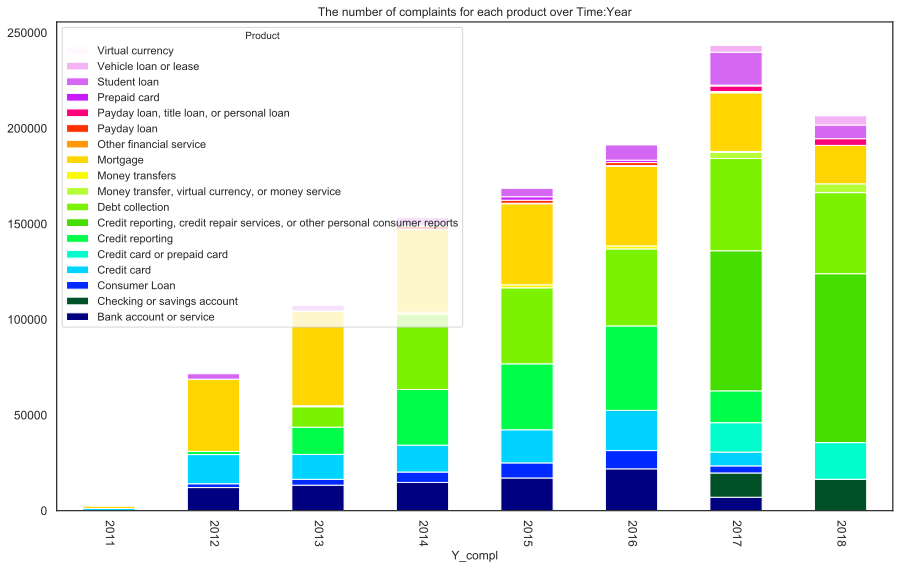

In [111]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual


import seaborn as sns        
sns.set(style="white")  

############### YEAR
GB1= time_resp_Analyse.groupby(['Y_compl', 'Product'])['Y_compl'].count().unstack('Product').fillna(0)

############### SEASON
GB2= time_resp_Analyse.groupby(['Y_compl','Season' ,'Product'])['Season'].count().unstack('Product').fillna(0)
   
############### MONTH
GB3= time_resp_Analyse.groupby(['Y_compl', 'M_compl', 'Product'])['M_compl'].count().unstack('Product').fillna(0)

#################



def plot_ProductComplains_overTime(timeStamp):
    #timeStamp=timeStamp.value
    if timeStamp=='Year':
        data=GB1
    elif timeStamp=='Season':
        data=GB2
    else :
        data=GB3
        
    return data.plot(kind='bar', stacked=True, figsize=(15,9), 
             title='The number of complaints for each product over Time:' + timeStamp,
             fontsize=12, legend='reverse', rot=-90, sort_columns=True, colormap='gist_ncar')

# ----------represent the interactive plot for year, month season ------- #
#interact(plot_ProductComplains_overTime,timeStamp=['Year', 'Season', 'Month'] )
#%config InlineBackend.figure_format = 'svg'

%matplotlib inline
plot_ProductComplains_overTime('Year')
plt.show()

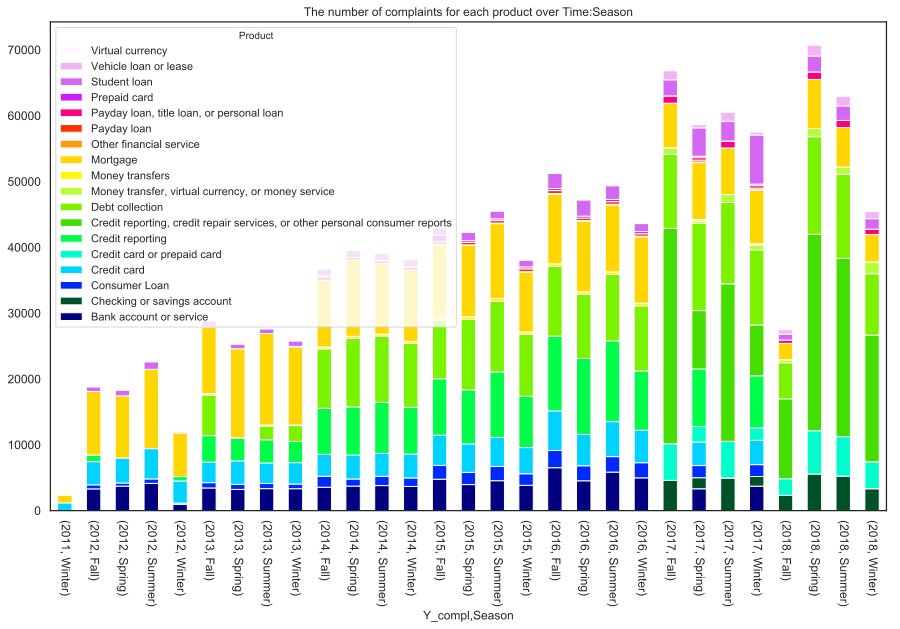

In [112]:
plot_ProductComplains_overTime('Season')


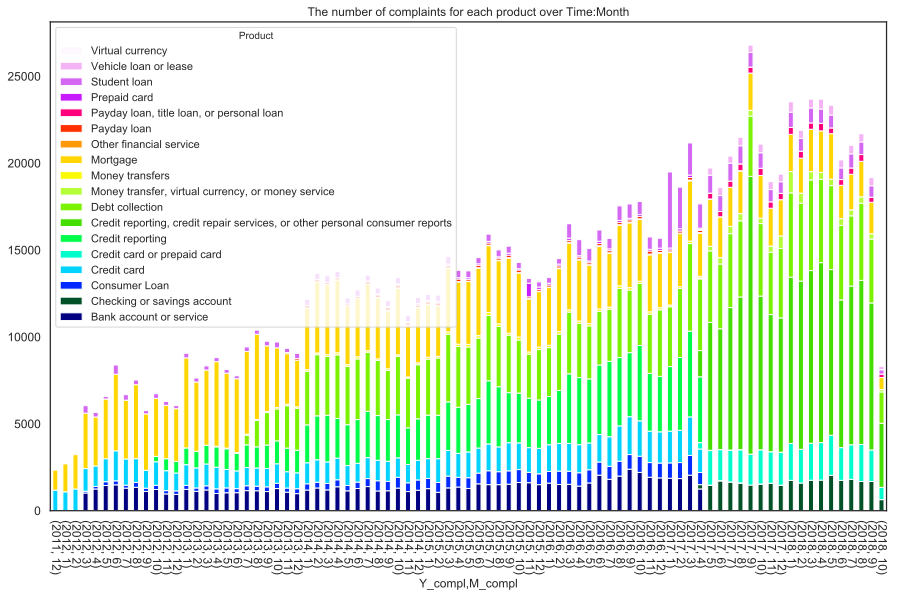

In [113]:
plot_ProductComplains_overTime('Month')

# Insights from the plots 

The stacked-bar (histogram) plot can be viewed over years, seasons and months. The goal of this plot was to hypothesize whether the number of complaints over each product is changing over time and if there is a detectable trend based on the year, season or month. 


By looking at the plot over the years:
Apparently during the years, 2 categories namely “checking/saving” is merged with” bank account&service” and the number complaints are almost uniform during the last 6-7 years
Debt collection and credit reporting is growing drastically, in 2017 and 2018 is the majority of complains
Vehicle loan, student loan and prepaid card complains are growing since 2017
Mortgage complaints is shrinking since 2017.


Based on SEASONs in each year, the maximum complains happened in the corresponding season as below which doesn’t reveal any specific pattern:
2012 -> summer ,
2013 -> fall ,
2014 -> spring ,
2015 -> summer ,
2016 ->  fall ,
2017 -> fall ,
2018 ->  spring .


